## <font color='red'>*CAPSTONE*</font>
### Student Name: <font color='darkblue'>Jon-Mikel Pearson</font>
### Date: 12/9/2021
### Description: Natural Language Processing - Disaster or Not

By using tweets from a Kaggle dataset, I will build a model that will accuraely
determine if tweets are about actual diasters or just user hyperbole.

In [1]:
# ensures that wordcloud and stop-words libraries installed locally
# not always the case with notebooks
import sys
!{sys.executable} -m pip install wordcloud stop-words 

You should consider upgrading via the '/Users/jon-mikelpearson/anaconda3/bin/python -m pip install --upgrade pip' command.


## Loading the data

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud

In [3]:
url = "./train.csv"
data = pd.read_csv(url)
df_raw = pd.DataFrame(data, columns = data.columns)

### Data exploration

In [4]:
df_raw.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df_raw.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [6]:
df = df_raw.copy() # preserve a copy of raw data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


### Column info

text = actual tweets

target = preprocessed (labelled) tweets 

    0 = not a disaster (hyperbole)
    1 = actual disaster referenced

In [8]:
columns = ["text","target"]
df = df[columns]
df.head(10)

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
5,#RockyFire Update => California Hwy. 20 closed...,1
6,#flood #disaster Heavy rain causes flash flood...,1
7,I'm on top of the hill and I can see a fire in...,1
8,There's an emergency evacuation happening now ...,1
9,I'm afraid that the tornado is coming to our a...,1


Creating a string of all words in tweets
to be used for a word cloud

In [9]:
Tweet_Texts = ""
for text in df["text"]:
    Tweet_Texts += text

Tweet_Texts

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us allForest fire near La Ronge Sask. CanadaAll residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected13,000 people receive #wildfires evacuation orders in California Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areasI'm on top of the hill and I can see a fire in the woods...There's an emergency evacuation happening now in the building across the streetI'm afraid that the tornado is coming to our area...Three people died from the heat wave so farHaha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding#raining #flooding #Florida #TampaBay #

Using code online to clean the tweets; remove unneccesary words and symbols

In [10]:
# courtesy of Python, Text Mining By Farukh Hashmi
# Converting the text column as a single string for wordcloud
Tweets_String=str(Tweet_Texts)

# regex library with many builtin filtering capabilities
import re

# Converting the whole text to lowercase
Tweet_Texts_Cleaned = Tweets_String.lower()

# Removing the twitter usernames from tweet string
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

# Removing the URLS from the tweet string
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


# Deleting everything which is not characters
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)

# Deleting any word which is less than 3-characters mostly those are stopwords
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,2}\b', '', Tweet_Texts_Cleaned)

# Stripping extra spaces in the text
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

Tweet_Texts_Cleaned

'our deeds are the reason this earthquake may allah forgive allforest fire near ronge sask canadaall residents asked shelter place are being notified officers other evacuation shelter place orders are expected people receive wildfires evacuation orders california just got sent this photo from ruby alaska smoke from wildfires pours into school rockyfire update california hwy closed both directions due lake county fire cafire wildfires flood disaster heavy rain causes flash flooding streets manitou colorado springs areasi top the hill and can see fire the woods there emergency evacuation happening now the building across the streeti afraid that the tornado coming our area three people died from the heat wave farhaha south tampa getting flooded hah wait second live south tampa what gonna what gonna fvck flooding raining flooding florida tampabay tampa days lost count flood bago myanmar arrived bagodamage school bus multi car crash breaking what man love fruitssummer lovelymy car fastwhat 

## Plotting the wordcloud 

This will give a rough idea of the most frequesnt words in the tweets

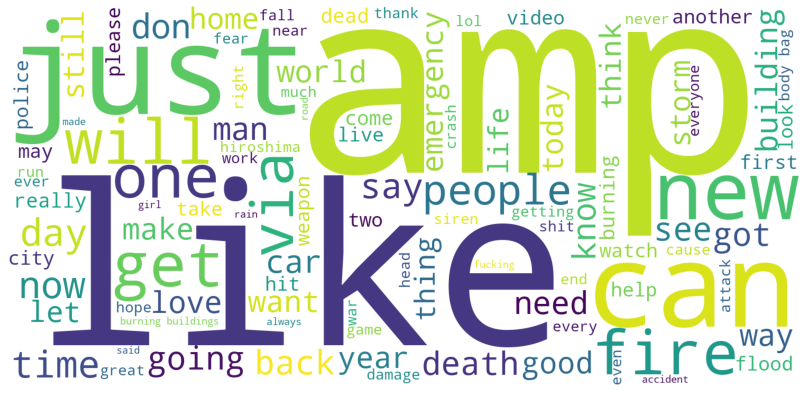

In [11]:
# used to create a list of words to be removed from word cloud
from stop_words import get_stop_words

# Creating the custom stopwords 
# by using a python library called stop-words
# and adding addition words as needed based on word cloud review
STOPWORDS = get_stop_words('en')
customStopwords=list(STOPWORDS)

# you can specify fonts, stopwords, background color and other options
#  use ?WordCloud to find out params
wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=3,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1500,
                          height=720
                          ).generate(Tweet_Texts_Cleaned)

plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

Too many unnecessary words. Need to filter more

### What are the most common words?

Can I use this list to remove unnecessary ones?
Notice where disaster is? Probably need to keep this and after, then
slectively remove other words

In [12]:
import nltk
data = Tweet_Texts_Cleaned.split(" ")
fdist1 = nltk.FreqDist(data)
fdist1.most_common(50)

[('the', 3096),
 ('and', 1414),
 ('for', 888),
 ('you', 876),
 ('that', 608),
 ('with', 572),
 ('this', 446),
 ('from', 421),
 ('are', 402),
 ('was', 382),
 ('have', 381),
 ('amp', 344),
 ('like', 343),
 ('but', 312),
 ('just', 304),
 ('not', 291),
 ('your', 291),
 ('out', 266),
 ('all', 257),
 ('will', 255),
 ('after', 252),
 ('can', 249),
 ('has', 244),
 ('fire', 236),
 ('get', 226),
 ('when', 226),
 ('they', 224),
 ('via', 219),
 ('about', 213),
 ('more', 212),
 ('now', 210),
 ('what', 195),
 ('people', 194),
 ('been', 191),
 ('over', 189),
 ('one', 186),
 ('new', 184),
 ('who', 182),
 ('there', 175),
 ('into', 173),
 ('don', 173),
 ('news', 168),
 ('how', 165),
 ('disaster', 148),
 ('emergency', 146),
 ('than', 139),
 ('video', 139),
 ('would', 135),
 ('her', 129),
 ('his', 128)]

In [13]:
# build a custom list of words to remove
word_list = []
for data in fdist1.most_common(200):
    #     retains the words disaster and emergency
    if data[0] != "emergency" and data[0] != "disaster" and len(data[0]) < 6:
        word_list.append(data[0])
word_list

['the',
 'and',
 'for',
 'you',
 'that',
 'with',
 'this',
 'from',
 'are',
 'was',
 'have',
 'amp',
 'like',
 'but',
 'just',
 'not',
 'your',
 'out',
 'all',
 'will',
 'after',
 'can',
 'has',
 'fire',
 'get',
 'when',
 'they',
 'via',
 'about',
 'more',
 'now',
 'what',
 'been',
 'over',
 'one',
 'new',
 'who',
 'there',
 'into',
 'don',
 'news',
 'how',
 'than',
 'video',
 'would',
 'her',
 'his',
 'body',
 'were',
 'time',
 'still',
 'some',
 'crash',
 'off',
 'storm',
 'day',
 'know',
 'back',
 'them',
 'got',
 'had',
 'man',
 'first',
 'fires',
 'bomb',
 'see',
 'going',
 'dead',
 'why',
 'world',
 'our',
 'love',
 'their',
 'full',
 'year',
 'car',
 'today',
 'train',
 'war',
 'here',
 'down',
 'may',
 'being',
 'two',
 'old',
 'life',
 'say',
 'only',
 'let',
 'many',
 'think',
 'home',
 'could',
 'good',
 'its',
 'then',
 'way',
 'years',
 'make',
 'she',
 'last',
 'too',
 'want',
 'did',
 'mass',
 'work',
 'need',
 'even',
 'army',
 'take',
 'look',
 'him',
 'help',
 'right'

### Gives a better idea of the relevance to other words from the tweets based on size

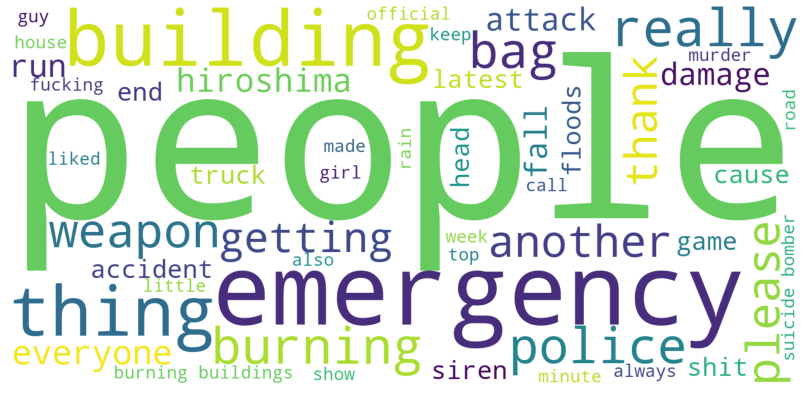

In [14]:
STOPWORDS = get_stop_words('en') + word_list
customStopwords=list(STOPWORDS)

wordcloudimage = WordCloud(
                          max_words=50, # reduced words from 100 to 50
                          max_font_size=500,
                          font_step=3,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1500,
                          height=720
                          ).generate(Tweet_Texts_Cleaned)

plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

# Other ideas for data visualization

    1.Length of text versus target?

## Training the NLP

In [36]:
def remove_common_words(str):
    text_cleaned_removed = []
    temp_tweet = str.lower().split(" ")
    
    for word in temp_tweet:
        if len(word) > 4: # focus on words 5 characters or more
            if word not in word_list: text_cleaned_removed.append(word) # removes the most common words
    return " ".join(text_cleaned_removed)


In [37]:
### Part of the challenge is cleaning the text to get rid of symbols and other weird syntax
import re

def cleanup_text(data):
    url_pattern = re.compile('https?:\/\/')
    mention_pattern = re.compile("@[A-Za-z0-9_]+|#[A-Za-z0-9_]+")
    short_twitter_pattern = re.compile("t.co/+")
    
    data = data.apply(lambda x: remove_common_words(x))
    data = data.apply(lambda x: x[:301] if pd.isna(x) != True else x)
    data = data.apply(lambda x: re.sub(url_pattern, '', x) if pd.isna(x) != True else x)
    data = data.apply(lambda x: re.sub(mention_pattern, '', x) if pd.isna(x) != True else x)
    data = data.apply(lambda x: re.sub(short_twitter_pattern, '', x) if pd.isna(x) != True else x)
    return data


In [38]:
# Remove all unwanted syntax, symbols, etc....
# compare to df_data.tail(10) above to see some of the changes
# MORE work needed
text_cleaned = cleanup_text(df.text)
text_cleaned.head(10)

0                          deeds reason  allah forgive
1                            forest ronge sask. canada
2    residents asked 'shelter place' notified offic...
3    13,000 people receive  evacuation orders calif...
4                           photo  smoke  pours school
5         update california closed directions county  
6      heavy causes flash flooding streets manitou,...
7                                             woods...
8    there's emergency evacuation happening buildin...
9                        afraid tornado coming area...
Name: text, dtype: object

In [39]:
X = text_cleaned # data after preprocessing and claening
y = df["target"]

# splits data that is never touched
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) 

# splits full data into actual training set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2, random_state=42)

In [40]:
X_train.head()

1642               tongue collapsed puddle whole covered.
4024                     little forest wardens aprensss3x
4532    bolsters health reviews investigative journali...
3676              baskets charming fatality  xyav4t5n0o  
630                                    fight bioterrorism
Name: text, dtype: object

In [41]:
X_train.values

array([' tongue collapsed puddle whole covered.',
       'little forest wardens aprensss3x',
       'bolsters health reviews investigative journalism: injured patients local e8aegofdy2',
       ...,
       '  beginners  tutorial.: ukqybhxmqi everyone wants learn build idws2zgysa',
       'demolished personal imullbvued',
       "rotating report 'huge' 'massive' 'violent' tornado j3di85ist5"],
      dtype=object)

In [42]:
tweets = X_train.values
# verifying no alterations happened
tweets

array([' tongue collapsed puddle whole covered.',
       'little forest wardens aprensss3x',
       'bolsters health reviews investigative journalism: injured patients local e8aegofdy2',
       ...,
       '  beginners  tutorial.: ukqybhxmqi everyone wants learn build idws2zgysa',
       'demolished personal imullbvued',
       "rotating report 'huge' 'massive' 'violent' tornado j3di85ist5"],
      dtype=object)

### Need a way to covert words to numbers

Tokenizer will iterate through our training tweets
and will only focus on the top 2000 (most repeated) words

#### NOTE: I will need to find a way to remove some of these words - stop-words? 
Many of these words are not needed nor wanted (a, the, " ", his, etc...)

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000, char_level=False, lower=True)

# converts words to numerical value
tokenizer.fit_on_texts(tweets)

In [44]:
# converts numbers to words and creates a document (new tweet using only numbers)
encoded_docs = tokenizer.texts_to_sequences(tweets)

In [45]:
# ensures all tweets are the same length by padding to 200 characters
# NOTE: may go away once better preprocesssing is done
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200)
padded_sequence

array([[   0,    0,    0, ...,  193,  145,  993],
       [   0,    0,    0, ...,    0,   52,   20],
       [   0,    0,    0, ..., 1372,   36,  776],
       ...,
       [   0,    0,    0, ...,  474,  768,  976],
       [   0,    0,    0, ...,    0,    0,  209],
       [   0,    0,    0, ...,    0,  133,  224]], dtype=int32)

### Build the model

Using a variation of a tutorial found online

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

vocab_size = 2000
embedding_vector_length = 2
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 2)            4000      
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 2)           0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                10600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 14,651
Trainable params: 14,651
Non-trainable params: 0
__________________________________________________

### Actual training happens here

In [47]:
history = model.fit(padded_sequence, y_train ,validation_split=0.3, epochs=5, batch_size=128)

Epoch 1/5
27/27 [==============================] - 12s 310ms/step - loss: 0.6872 - accuracy: 0.5651 - val_loss: 0.6843 - val_accuracy: 0.5616
Epoch 2/5
27/27 [==============================] - 7s 258ms/step - loss: 0.6815 - accuracy: 0.5701 - val_loss: 0.6823 - val_accuracy: 0.5616
Epoch 3/5
27/27 [==============================] - 7s 256ms/step - loss: 0.6782 - accuracy: 0.5701 - val_loss: 0.6775 - val_accuracy: 0.5616
Epoch 4/5
27/27 [==============================] - 7s 264ms/step - loss: 0.6705 - accuracy: 0.5730 - val_loss: 0.6660 - val_accuracy: 0.5698
Epoch 5/5
27/27 [==============================] - 8s 283ms/step - loss: 0.6517 - accuracy: 0.6355 - val_loss: 0.6397 - val_accuracy: 0.6655


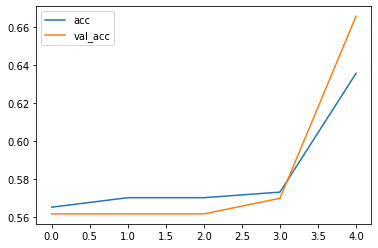

In [48]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.savefig("AccuracyPlot1.jpg") #2000 words and 2000 vocab_size
plt.show()

## Testing for predictions

In [49]:
valid_tweets = X_valid[-5:] # last 5 tweets from validation set
valid_labels = y_valid[-5:] # last 5 labels from validation set

print(f"Text:\n{valid_tweets}\n\nActual label:\n{valid_labels}")

Text:
4246    issues hazardous weather outlook (hwo) a0ad8z5vsr
3314                      seconds bitches evacuate ??????
3819    added 'sandy responders homes' group : lkxi6uxjaq
1209                   rioting burning buildings looting.
6833            trapped insane leaving pretty! grlxurko8d
Name: text, dtype: object

Actual label:
4246    1
3314    0
3819    1
1209    1
6833    0
Name: target, dtype: int64


In [50]:
tweets = valid_tweets.values
tweets

array(['issues hazardous weather outlook (hwo) a0ad8z5vsr',
       'seconds bitches evacuate ??????',
       "added 'sandy responders homes' group : lkxi6uxjaq",
       '  rioting burning buildings looting.',
       'trapped insane leaving pretty! grlxurko8d'], dtype=object)

In [51]:
tweet_labels = valid_labels.values
tweet_labels

array([1, 0, 1, 1, 0])

### Validation set did not go through preprocessing


Here a function can be used to preprocess and make predictions of tweets

In [52]:
def predict_sentiment(text, index):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print(f"Predicted label: {prediction}, Actual label: {tweet_labels[index]}")
    return 1 if prediction == tweet_labels[index] else 0

In [53]:
counter = 0
result = 0
for text in tweets:
    result += predict_sentiment(text, counter)
    counter +=1
print(f"Accuracy: {(result/counter):.2f}")

Predicted label: 0, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 1
Predicted label: 0, Actual label: 1
Predicted label: 0, Actual label: 0
Accuracy: 0.40


In [54]:
valid_tweets = X_valid[-10:] # last 10 tweets from validation set
valid_labels = y_valid[-10:] # last 10 labels from validation set

print(f"Text:\n{valid_tweets}\n\nActual label:\n{valid_labels}")

Text:
2147    weyburn police public fentanyl deaths province...
2919     tears drowned terrible taste nataly steak che...
2223     sometimes backs truck unloads descriptive del...
1409     another shooting movie theater getting crazie...
5378    card.\npanic.\nkind driver.\nreplace card.\nfi...
4246    issues hazardous weather outlook (hwo) a0ad8z5vsr
3314                      seconds bitches evacuate ??????
3819    added 'sandy responders homes' group : lkxi6uxjaq
1209                   rioting burning buildings looting.
6833            trapped insane leaving pretty! grlxurko8d
Name: text, dtype: object

Actual label:
2147    1
2919    0
2223    0
1409    1
5378    0
4246    1
3314    0
3819    1
1209    1
6833    0
Name: target, dtype: int64


In [55]:
tweets = valid_tweets.values
tweet_labels = valid_labels.values
counter = 0
result = 0
for text in tweets:
    result += predict_sentiment(text, counter)
    counter +=1
print(f"Accuracy: {(result/counter):.2f}")

Predicted label: 0, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 1
Predicted label: 0, Actual label: 1
Predicted label: 0, Actual label: 0
Accuracy: 0.60


### What if I increased epochs to 10, everything else the same?

In [56]:
history = model.fit(padded_sequence, y_train ,validation_split=0.3, epochs=10, batch_size=128)

Epoch 1/10
27/27 [==============================] - 7s 266ms/step - loss: 0.6251 - accuracy: 0.6792 - val_loss: 0.6157 - val_accuracy: 0.7168
Epoch 2/10
27/27 [==============================] - 8s 276ms/step - loss: 0.5832 - accuracy: 0.7152 - val_loss: 0.5878 - val_accuracy: 0.6990
Epoch 3/10
27/27 [==============================] - 7s 245ms/step - loss: 0.5510 - accuracy: 0.7317 - val_loss: 0.5438 - val_accuracy: 0.7332
Epoch 4/10
27/27 [==============================] - 7s 251ms/step - loss: 0.5066 - accuracy: 0.7604 - val_loss: 0.5107 - val_accuracy: 0.7462
Epoch 5/10
27/27 [==============================] - 7s 259ms/step - loss: 0.4831 - accuracy: 0.7716 - val_loss: 0.5018 - val_accuracy: 0.7572
Epoch 6/10
27/27 [==============================] - 7s 267ms/step - loss: 0.4617 - accuracy: 0.7874 - val_loss: 0.5029 - val_accuracy: 0.7544
Epoch 7/10
27/27 [==============================] - 7s 264ms/step - loss: 0.4498 - accuracy: 0.7915 - val_loss: 0.4979 - val_accuracy: 0.7633
Epoch 

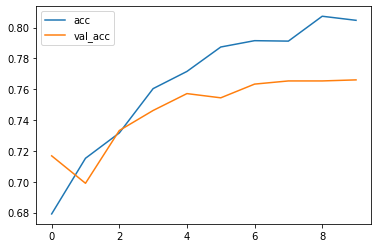

In [57]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.savefig("AccuracyPlot2.jpg") 
plt.show()

In [58]:
tweets = valid_tweets.values
tweet_labels = valid_labels.values
counter = 0
result = 0
for text in tweets:
    result += predict_sentiment(text, counter)
    counter +=1
print(f"Accuracy: {(result/counter):.2f}")

Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 1
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Accuracy: 0.90


### What if I decreased batches?


In [59]:
history = model.fit(padded_sequence, y_train ,validation_split=0.3, epochs=10, batch_size=32)

Epoch 1/10
107/107 [==============================] - 24s 225ms/step - loss: 0.4345 - accuracy: 0.7944 - val_loss: 0.5056 - val_accuracy: 0.7627
Epoch 2/10
107/107 [==============================] - 25s 231ms/step - loss: 0.4205 - accuracy: 0.8038 - val_loss: 0.4999 - val_accuracy: 0.7722
Epoch 3/10
107/107 [==============================] - 22s 206ms/step - loss: 0.4030 - accuracy: 0.8179 - val_loss: 0.5075 - val_accuracy: 0.7695
Epoch 4/10
107/107 [==============================] - 22s 201ms/step - loss: 0.4017 - accuracy: 0.8103 - val_loss: 0.5115 - val_accuracy: 0.7702
Epoch 5/10
107/107 [==============================] - 24s 225ms/step - loss: 0.4051 - accuracy: 0.8117 - val_loss: 0.5153 - val_accuracy: 0.7681
Epoch 6/10
107/107 [==============================] - 23s 217ms/step - loss: 0.3967 - accuracy: 0.8094 - val_loss: 0.5282 - val_accuracy: 0.7729
Epoch 7/10
107/107 [==============================] - 22s 201ms/step - loss: 0.3893 - accuracy: 0.8194 - val_loss: 0.5330 - val_ac

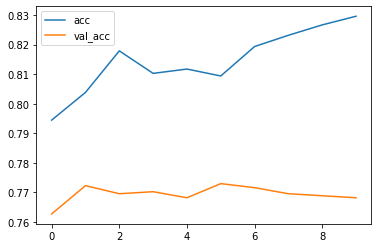

In [60]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.savefig("AccuracyPlot3.jpg") 
plt.show()

In [61]:
tweets = valid_tweets.values
tweet_labels = valid_labels.values
counter = 0
result = 0
for text in tweets:
    result += predict_sentiment(text, counter)
    counter +=1
print(f"Accuracy: {(result/counter):.2f}")

Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 1
Predicted label: 1, Actual label: 1
Predicted label: 1, Actual label: 0
Accuracy: 0.80


## By simply reducing batch size and increasing epochs resulted in an increase in accuracy.
### But can I get better?

What if I increased vocabulary size?

In [62]:
vocab_size = len(encoded_docs) # size of actual encoded documents
embedding_vector_length = 2
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 2)            9744      
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 2)           0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 50)                10600     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 20,395
Trainable params: 20,395
Non-trainable params: 0
__________________________________________________

In [63]:
history = model.fit(padded_sequence, y_train ,validation_split=0.3, epochs=10, batch_size=128)

Epoch 1/10
27/27 [==============================] - 11s 273ms/step - loss: 0.6854 - accuracy: 0.5639 - val_loss: 0.6849 - val_accuracy: 0.5616
Epoch 2/10
27/27 [==============================] - 7s 263ms/step - loss: 0.6805 - accuracy: 0.5701 - val_loss: 0.6801 - val_accuracy: 0.5616
Epoch 3/10
27/27 [==============================] - 7s 246ms/step - loss: 0.6737 - accuracy: 0.5701 - val_loss: 0.6701 - val_accuracy: 0.5616
Epoch 4/10
27/27 [==============================] - 7s 250ms/step - loss: 0.6564 - accuracy: 0.6208 - val_loss: 0.6505 - val_accuracy: 0.6785
Epoch 5/10
27/27 [==============================] - 7s 262ms/step - loss: 0.6336 - accuracy: 0.6698 - val_loss: 0.6269 - val_accuracy: 0.6607
Epoch 6/10
27/27 [==============================] - 7s 277ms/step - loss: 0.6110 - accuracy: 0.7003 - val_loss: 0.6024 - val_accuracy: 0.7155
Epoch 7/10
27/27 [==============================] - 7s 256ms/step - loss: 0.5747 - accuracy: 0.7299 - val_loss: 0.5566 - val_accuracy: 0.7209
Epoch

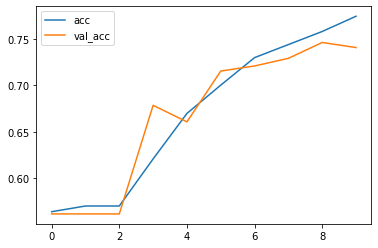

In [64]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.savefig("AccuracyPlot4_lowercase.jpg") # vocab_size same as number of words in encoded doc
plt.show()

In [65]:
tweets = valid_tweets.values
tweet_labels = valid_labels.values
counter = 0
result = 0
for text in tweets:
    result += predict_sentiment(text, counter)
    counter +=1
print(f"Accuracy: {(result/counter):.2f}")

Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 1
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Accuracy: 0.90


What if vocab size reduce to 1000?

In [66]:
tweets = X_train.values
tokenizer = Tokenizer(num_words=1000, char_level=False)

# converts words to numerical value
tokenizer.fit_on_texts(tweets)
# converts numbers to words and creates a document (new tweet using only numbers)
encoded_docs = tokenizer.texts_to_sequences(tweets)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

vocab_size = 1000
embedding_vector_length = 2
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 2)            2000      
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 200, 2)           0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 50)                10600     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 12,651
Trainable params: 12,651
Non-trainable params: 0
__________________________________________________

In [67]:
history = model.fit(padded_sequence, y_train ,validation_split=0.3, epochs=10, batch_size=128)

Epoch 1/10
27/27 [==============================] - 13s 333ms/step - loss: 0.6860 - accuracy: 0.5689 - val_loss: 0.6859 - val_accuracy: 0.5616
Epoch 2/10
27/27 [==============================] - 8s 300ms/step - loss: 0.6820 - accuracy: 0.5701 - val_loss: 0.6823 - val_accuracy: 0.5616
Epoch 3/10
27/27 [==============================] - 7s 269ms/step - loss: 0.6776 - accuracy: 0.5701 - val_loss: 0.6769 - val_accuracy: 0.5616
Epoch 4/10
27/27 [==============================] - 8s 291ms/step - loss: 0.6680 - accuracy: 0.5751 - val_loss: 0.6636 - val_accuracy: 0.5629
Epoch 5/10
27/27 [==============================] - 8s 294ms/step - loss: 0.6458 - accuracy: 0.6387 - val_loss: 0.6388 - val_accuracy: 0.6313
Epoch 6/10
27/27 [==============================] - 7s 273ms/step - loss: 0.6291 - accuracy: 0.6806 - val_loss: 0.6162 - val_accuracy: 0.6724
Epoch 7/10
27/27 [==============================] - 8s 287ms/step - loss: 0.6039 - accuracy: 0.6921 - val_loss: 0.5908 - val_accuracy: 0.6970
Epoch

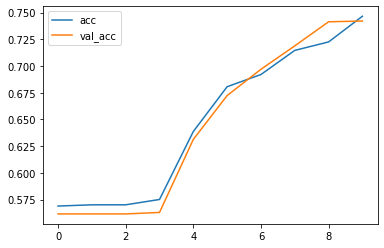

In [68]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.savefig("AccuracyPlot5.jpg") # vocab size 1000
plt.show()

In [69]:
tweets = valid_tweets.values
tweet_labels = valid_labels.values
counter = 0
result = 0
for text in tweets:
    result += predict_sentiment(text, counter)
    counter +=1
print(f"Accuracy: {(result/counter):.2f}")

Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 1
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Accuracy: 0.90


What if vocab size is increased to 3000?

In [70]:
tweets = X_train.values

tokenizer = Tokenizer(num_words=3000, char_level=False)

# converts words to numerical value
tokenizer.fit_on_texts(tweets)
# converts numbers to words and creates a document (new tweet using only numbers)
encoded_docs = tokenizer.texts_to_sequences(tweets)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

vocab_size = 3000
embedding_vector_length = 2
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 2)            6000      
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 200, 2)           0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 50)                10600     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 16,651
Trainable params: 16,651
Non-trainable params: 0
__________________________________________________

In [71]:
history = model.fit(padded_sequence, y_train ,validation_split=0.3, epochs=10, batch_size=128)

Epoch 1/10
27/27 [==============================] - 11s 284ms/step - loss: 0.6856 - accuracy: 0.5648 - val_loss: 0.6865 - val_accuracy: 0.5616
Epoch 2/10
27/27 [==============================] - 8s 282ms/step - loss: 0.6804 - accuracy: 0.5701 - val_loss: 0.6811 - val_accuracy: 0.5616
Epoch 3/10
27/27 [==============================] - 8s 284ms/step - loss: 0.6737 - accuracy: 0.5704 - val_loss: 0.6720 - val_accuracy: 0.5616
Epoch 4/10
27/27 [==============================] - 7s 251ms/step - loss: 0.6533 - accuracy: 0.6129 - val_loss: 0.6468 - val_accuracy: 0.6252
Epoch 5/10
27/27 [==============================] - 7s 269ms/step - loss: 0.6376 - accuracy: 0.6633 - val_loss: 0.6319 - val_accuracy: 0.6532
Epoch 6/10
27/27 [==============================] - 8s 279ms/step - loss: 0.6050 - accuracy: 0.7021 - val_loss: 0.6009 - val_accuracy: 0.6902
Epoch 7/10
27/27 [==============================] - 7s 268ms/step - loss: 0.5698 - accuracy: 0.7261 - val_loss: 0.5683 - val_accuracy: 0.7127
Epoch

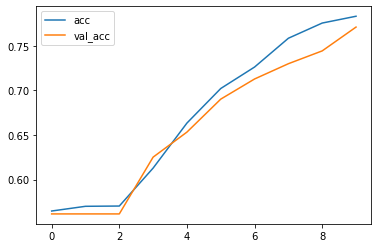

In [72]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.savefig("AccuracyPlot6.jpg") # vocab size 3000
plt.show()

In [73]:
tweets = valid_tweets.values
tweet_labels = valid_labels.values
counter = 0
result = 0
for text in tweets:
    result += predict_sentiment(text, counter)
    counter +=1
print(f"Accuracy: {(result/counter):.2f}")

Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 1
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Accuracy: 0.90


## What about changes to the model?

1) Using Conv1D

In [74]:
tweets = X_train.values
tokenizer = Tokenizer(num_words=1000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',char_level=False)

# converts words to numerical value
tokenizer.fit_on_texts(tweets)
# converts numbers to words and creates a document (new tweet using only numbers)
encoded_docs = tokenizer.texts_to_sequences(tweets)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

vocab_size = 3000
embedding_vector_length = 2
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200, mask_zero=True))
model.add(tf.keras.layers.Conv1D(256, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=3))
model.add(tf.keras.layers.Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 2)            6000      
                                                                 
 conv1d (Conv1D)             (None, 198, 256)          1792      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 66, 256)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16896)             0         
                                                                 
 dense_5 (Dense)             (None, 1)                 16897     
                                                                 
Total params: 24,689
Trainable params: 24,689
Non-trainable params: 0
__________________________________________________

In [75]:
history = model.fit(padded_sequence, y_train ,validation_split=0.3, epochs=10, batch_size=32)

Epoch 1/10
107/107 [==============================] - 3s 24ms/step - loss: 0.6780 - accuracy: 0.5777 - val_loss: 0.6566 - val_accuracy: 0.5964
Epoch 2/10
107/107 [==============================] - 3s 27ms/step - loss: 0.5772 - accuracy: 0.7194 - val_loss: 0.5362 - val_accuracy: 0.7394
Epoch 3/10
107/107 [==============================] - 3s 24ms/step - loss: 0.4595 - accuracy: 0.7930 - val_loss: 0.5067 - val_accuracy: 0.7674
Epoch 4/10
107/107 [==============================] - 2s 22ms/step - loss: 0.4138 - accuracy: 0.8170 - val_loss: 0.5150 - val_accuracy: 0.7668
Epoch 5/10
107/107 [==============================] - 3s 24ms/step - loss: 0.3887 - accuracy: 0.8328 - val_loss: 0.5295 - val_accuracy: 0.7715
Epoch 6/10
107/107 [==============================] - 2s 21ms/step - loss: 0.3711 - accuracy: 0.8390 - val_loss: 0.5460 - val_accuracy: 0.7668
Epoch 7/10
107/107 [==============================] - 2s 22ms/step - loss: 0.3551 - accuracy: 0.8469 - val_loss: 0.5676 - val_accuracy: 0.7654

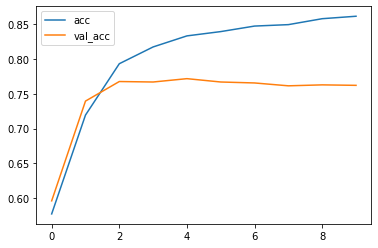

In [76]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.savefig("AccuracyPlot7.jpg") # vocab size 3000
plt.show()

In [77]:
tweets = valid_tweets.values
tweet_labels = valid_labels.values
counter = 0
result = 0
for text in tweets:
    result += predict_sentiment(text, counter)
    counter +=1
print(f"Accuracy: {(result/counter):.2f}")

Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 1
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Accuracy: 0.90


### No changes to accuracy BUT it was much faster.

2) What about changing the length of the tweets? From 200 to 300.

In [78]:
tweets = X_train.values
tokenizer = Tokenizer(num_words=1000, char_level=False)

# converts words to numerical value
tokenizer.fit_on_texts(tweets)
# converts numbers to words and creates a document (new tweet using only numbers)
encoded_docs = tokenizer.texts_to_sequences(tweets)
padded_sequence = pad_sequences(encoded_docs, maxlen=300)

vocab_size = 1000
embedding_vector_length = 2
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=300))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 300, 2)            2000      
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 300, 2)           0         
 lDropout1D)                                                     
                                                                 
 lstm_5 (LSTM)               (None, 50)                10600     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 12,651
Trainable params: 12,651
Non-trainable params: 0
__________________________________________________

In [127]:
history = model.fit(padded_sequence, y_train ,validation_split=0.3, epochs=10, batch_size=128)

Epoch 1/10
27/27 [==============================] - 14s 382ms/step - loss: 0.6869 - accuracy: 0.5639 - val_loss: 0.6848 - val_accuracy: 0.5616
Epoch 2/10
27/27 [==============================] - 11s 403ms/step - loss: 0.6814 - accuracy: 0.5701 - val_loss: 0.6835 - val_accuracy: 0.5616
Epoch 3/10
27/27 [==============================] - 10s 352ms/step - loss: 0.6776 - accuracy: 0.5701 - val_loss: 0.6768 - val_accuracy: 0.5616
Epoch 4/10
27/27 [==============================] - 10s 355ms/step - loss: 0.6662 - accuracy: 0.5795 - val_loss: 0.6567 - val_accuracy: 0.5759
Epoch 5/10
27/27 [==============================] - 10s 362ms/step - loss: 0.6255 - accuracy: 0.6601 - val_loss: 0.6012 - val_accuracy: 0.7182
Epoch 6/10
27/27 [==============================] - 10s 364ms/step - loss: 0.5822 - accuracy: 0.7103 - val_loss: 0.5599 - val_accuracy: 0.7326
Epoch 7/10
27/27 [==============================] - 10s 380ms/step - loss: 0.5490 - accuracy: 0.7422 - val_loss: 0.5318 - val_accuracy: 0.7681

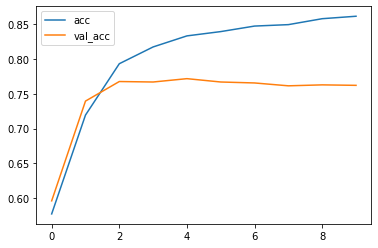

In [79]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.savefig("AccuracyPlot8.jpg") # vocab size 3000
plt.show()

In [80]:
def predict_sentiment(text, index):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=300)
    prediction = int(model.predict(tw).round().item())
    print(f"Predicted label: {prediction}, Actual label: {tweet_labels[index]}")
    return 1 if prediction == tweet_labels[index] else 0

In [81]:
tweets = valid_tweets.values
tweet_labels = valid_labels.values
counter = 0
result = 0
for text in tweets:
    result += predict_sentiment(text, counter)
    counter +=1
print(f"Accuracy: {(result/counter):.2f}")

Predicted label: 1, Actual label: 1
Predicted label: 1, Actual label: 0
Predicted label: 1, Actual label: 0
Predicted label: 0, Actual label: 1
Predicted label: 1, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 1, Actual label: 0
Predicted label: 0, Actual label: 1
Predicted label: 1, Actual label: 1
Predicted label: 1, Actual label: 0
Accuracy: 0.30


In [82]:
tweets = X_train.values
tokenizer = Tokenizer(num_words=2000, char_level=False)

# converts words to numerical value
tokenizer.fit_on_texts(tweets)
# converts numbers to words and creates a document (new tweet using only numbers)
encoded_docs = tokenizer.texts_to_sequences(tweets)
padded_sequence = pad_sequences(encoded_docs, maxlen=300)

vocab_size = 2000
embedding_vector_length = 2
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=300))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 300, 2)            4000      
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 300, 2)           0         
 lDropout1D)                                                     
                                                                 
 lstm_6 (LSTM)               (None, 50)                10600     
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 14,651
Trainable params: 14,651
Non-trainable params: 0
__________________________________________________

In [83]:
history = model.fit(padded_sequence, y_train ,validation_split=0.3, epochs=10, batch_size=32)

Epoch 1/10
107/107 [==============================] - 37s 316ms/step - loss: 0.6838 - accuracy: 0.5683 - val_loss: 0.6804 - val_accuracy: 0.5616
Epoch 2/10
107/107 [==============================] - 35s 326ms/step - loss: 0.6638 - accuracy: 0.6026 - val_loss: 0.6368 - val_accuracy: 0.6566
Epoch 3/10
107/107 [==============================] - 33s 310ms/step - loss: 0.6085 - accuracy: 0.6935 - val_loss: 0.5753 - val_accuracy: 0.7209
Epoch 4/10
107/107 [==============================] - 33s 310ms/step - loss: 0.5369 - accuracy: 0.7437 - val_loss: 0.5347 - val_accuracy: 0.7209
Epoch 5/10
107/107 [==============================] - 35s 328ms/step - loss: 0.4871 - accuracy: 0.7683 - val_loss: 0.4978 - val_accuracy: 0.7531
Epoch 6/10
107/107 [==============================] - 33s 305ms/step - loss: 0.4661 - accuracy: 0.7848 - val_loss: 0.4941 - val_accuracy: 0.7640
Epoch 7/10
107/107 [==============================] - 33s 311ms/step - loss: 0.4471 - accuracy: 0.7906 - val_loss: 0.4957 - val_ac

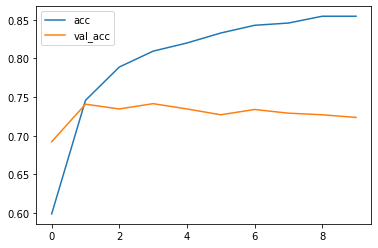

In [90]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.savefig("AccuracyPlot9.jpg") # vocab size 2000
plt.show()

In [91]:
tweets = valid_tweets.values
tweet_labels = valid_labels.values
counter = 0
result = 0
for text in tweets:
    result += predict_sentiment(text, counter)
    counter +=1
print(f"Accuracy: {(result/counter):.2f}")

Predicted label: 1, Actual label: 1
Predicted label: 1, Actual label: 0
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 1
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Accuracy: 0.70


In [92]:
tweets = X_train.values
tokenizer = Tokenizer(num_words=1000, char_level=False)

# converts words to numerical value
tokenizer.fit_on_texts(tweets)
# converts numbers to words and creates a document (new tweet using only numbers)
encoded_docs = tokenizer.texts_to_sequences(tweets)
padded_sequence = pad_sequences(encoded_docs, maxlen=300)

vocab_size = 1000
embedding_vector_length = 10
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=300))
model.add(tf.keras.layers.Conv1D(256, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=3))
model.add(tf.keras.layers.Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 300, 10)           10000     
                                                                 
 conv1d_2 (Conv1D)           (None, 298, 256)          7936      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 99, 256)          0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 25344)             0         
                                                                 
 dense_9 (Dense)             (None, 1)                 25345     
                                                                 
Total params: 43,281
Trainable params: 43,281
Non-trainable params: 0
__________________________________________________

In [93]:
history = model.fit(padded_sequence, y_train ,validation_split=0.3, epochs=10, batch_size=32)

Epoch 1/10
107/107 [==============================] - 4s 36ms/step - loss: 0.6668 - accuracy: 0.6006 - val_loss: 0.6061 - val_accuracy: 0.6860
Epoch 2/10
107/107 [==============================] - 4s 34ms/step - loss: 0.5337 - accuracy: 0.7493 - val_loss: 0.5411 - val_accuracy: 0.7339
Epoch 3/10
107/107 [==============================] - 4s 35ms/step - loss: 0.4673 - accuracy: 0.7941 - val_loss: 0.5552 - val_accuracy: 0.7367
Epoch 4/10
107/107 [==============================] - 4s 34ms/step - loss: 0.4376 - accuracy: 0.8065 - val_loss: 0.5739 - val_accuracy: 0.7360
Epoch 5/10
107/107 [==============================] - 3s 32ms/step - loss: 0.4100 - accuracy: 0.8238 - val_loss: 0.5875 - val_accuracy: 0.7353
Epoch 6/10
107/107 [==============================] - 4s 34ms/step - loss: 0.3934 - accuracy: 0.8331 - val_loss: 0.6079 - val_accuracy: 0.7326
Epoch 7/10
107/107 [==============================] - 4s 33ms/step - loss: 0.3747 - accuracy: 0.8381 - val_loss: 0.6401 - val_accuracy: 0.7230

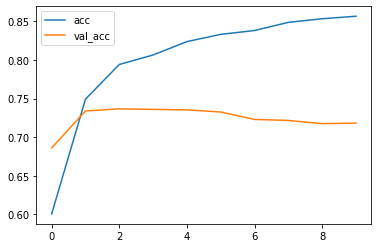

In [94]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.savefig("AccuracyPlot10.jpg") # vocab size 2000
plt.show()

In [95]:
tweets = valid_tweets.values
tweet_labels = valid_labels.values
counter = 0
result = 0
for text in tweets:
    result += predict_sentiment(text, counter)
    counter +=1
print(f"Accuracy: {(result/counter):.2f}")

Predicted label: 1, Actual label: 1
Predicted label: 1, Actual label: 0
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 1, Actual label: 1
Predicted label: 0, Actual label: 0
Predicted label: 0, Actual label: 1
Predicted label: 1, Actual label: 1
Predicted label: 1, Actual label: 0
Accuracy: 0.70
